Saving Screenshot 2025-08-26 103433.png to Screenshot 2025-08-26 103433.png
Saving Screenshot 2025-08-26 103517.png to Screenshot 2025-08-26 103517.png

Processing: Screenshot 2025-08-26 103433.png


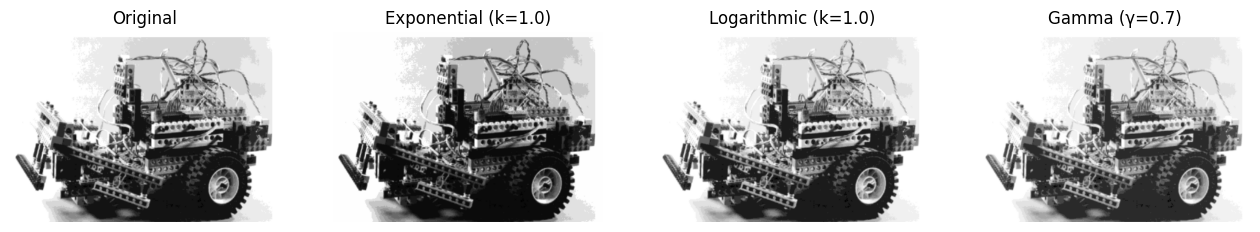

  orig | std=91.64 | entropy=5.330 | mean_grad=79.558
   exp | std=95.61 | entropy=5.278 | mean_grad=78.942
   log | std=87.71 | entropy=5.307 | mean_grad=78.187
 gamma | std=81.35 | entropy=5.264 | mean_grad=72.605

Processing: Screenshot 2025-08-26 103517.png


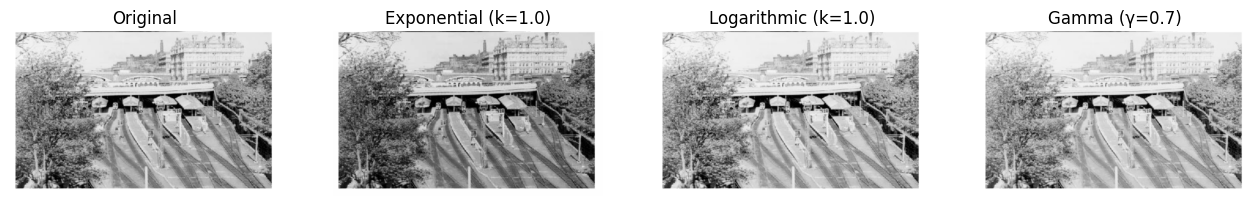

  orig | std=62.24 | entropy=7.346 | mean_grad=94.885
   exp | std=67.39 | entropy=7.248 | mean_grad=97.390
   log | std=58.13 | entropy=7.144 | mean_grad=90.339
 gamma | std=53.99 | entropy=7.023 | mean_grad=83.436


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

# ===== Upload images =====
uploaded = files.upload()  # upload your leg1 and trn1 here
image_paths = list(uploaded.keys())

# --------- Helpers ----------
def img_read_rgb(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is None:
        raise FileNotFoundError(f"Cannot read image: {path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def normalize01(im):
    im = im.astype(np.float32)
    im_min, im_max = im.min(), im.max()
    if im_max - im_min == 0:
        return np.zeros_like(im)
    return (im - im_min) / (im_max - im_min)

def to_uint8(im):
    return np.clip(im * 255.0, 0, 255).astype(np.uint8)

def entropy_gray(gray):
    hist = np.bincount((gray.flatten()).astype(np.uint8), minlength=256).astype(np.float64)
    p = hist / hist.sum()
    p_nonzero = p[p > 0]
    return -np.sum(p_nonzero * np.log2(p_nonzero))

def mean_gradient(gray):
    gx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
    gy = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)
    mag = np.sqrt(gx**2 + gy**2)
    return float(np.mean(mag))

# --------- Operators ----------
def exponential_operator(img01, k=1.0):
    denom = np.expm1(k)
    c = 1.0 / denom if denom != 0 else 1.0
    return np.clip(c * np.expm1(k * img01), 0.0, 1.0)

def logarithmic_operator(img01, k=1.0):
    denom = np.log1p(k)
    c = 1.0 / denom if denom != 0 else 1.0
    return np.clip(c * np.log1p(k * img01), 0.0, 1.0)

def gamma_correction(img01, gamma=1.0):
    return np.clip(img01 ** max(gamma, 1e-6), 0.0, 1.0)

# --------- Processing ----------
def process_and_compare(img_path, params):
    rgb = img_read_rgb(img_path)
    img01 = normalize01(rgb / 255.0)

    exp_img01 = exponential_operator(img01, k=params.get("k_exp", 1.0))
    log_img01 = logarithmic_operator(img01, k=params.get("k_log", 1.0))
    gamma_img01 = gamma_correction(img01, gamma=params.get("gamma", 0.7))

    exp_rgb, log_rgb, gamma_rgb = map(to_uint8, [exp_img01, log_img01, gamma_img01])

    gray_imgs = {
        "orig": cv2.cvtColor(to_uint8(img01), cv2.COLOR_RGB2GRAY),
        "exp": cv2.cvtColor(exp_rgb, cv2.COLOR_RGB2GRAY),
        "log": cv2.cvtColor(log_rgb, cv2.COLOR_RGB2GRAY),
        "gamma": cv2.cvtColor(gamma_rgb, cv2.COLOR_RGB2GRAY),
    }

    # Compute metrics
    results = {
        k: {
            "std": float(np.std(g)),
            "entropy": entropy_gray(g),
            "mean_grad": mean_gradient(g),
        }
        for k, g in gray_imgs.items()
    }

    # Show results
    fig, axes = plt.subplots(1, 4, figsize=(16,5))
    axes[0].imshow(to_uint8(img01)); axes[0].set_title("Original")
    axes[1].imshow(exp_rgb); axes[1].set_title(f"Exponential (k={params.get('k_exp',1.0)})")
    axes[2].imshow(log_rgb); axes[2].set_title(f"Logarithmic (k={params.get('k_log',1.0)})")
    axes[3].imshow(gamma_rgb); axes[3].set_title(f"Gamma (γ={params.get('gamma',0.7)})")
    for ax in axes: ax.axis('off')
    plt.show()

    return results

# ===== Run on uploaded images =====
params = {"k_exp": 1.0, "k_log": 1.0, "gamma": 0.7}

all_results = {}
for img_path in image_paths:
    print(f"\nProcessing: {img_path}")
    res = process_and_compare(img_path, params)
    all_results[img_path] = res
    for k,v in res.items():
        print(f"{k:>6} | std={v['std']:.2f} | entropy={v['entropy']:.3f} | mean_grad={v['mean_grad']:.3f}")


Saving Screenshot 2025-08-26 104014.png to Screenshot 2025-08-26 104014.png
Using file: Screenshot 2025-08-26 104014.png


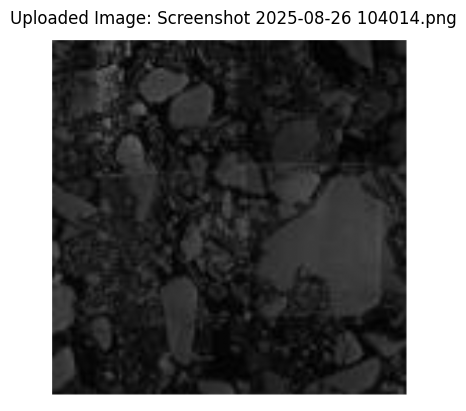

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# ===== Upload image(s) =====
uploaded = files.upload()

# Get the first uploaded file name
filename = list(uploaded.keys())[0]
print("Using file:", filename)

# Read the uploaded file in grayscale
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"Could not read the uploaded image: {filename}")

# Show uploaded image
plt.imshow(img, cmap="gray")
plt.title(f"Uploaded Image: {filename}")
plt.axis("off")
plt.show()


Saving Screenshot 2025-08-26 104014.png to Screenshot 2025-08-26 104014 (2).png


/tmp/ipython-input-3424027979.py:37: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(images[i].ravel(), 256, [0,256], color='black')


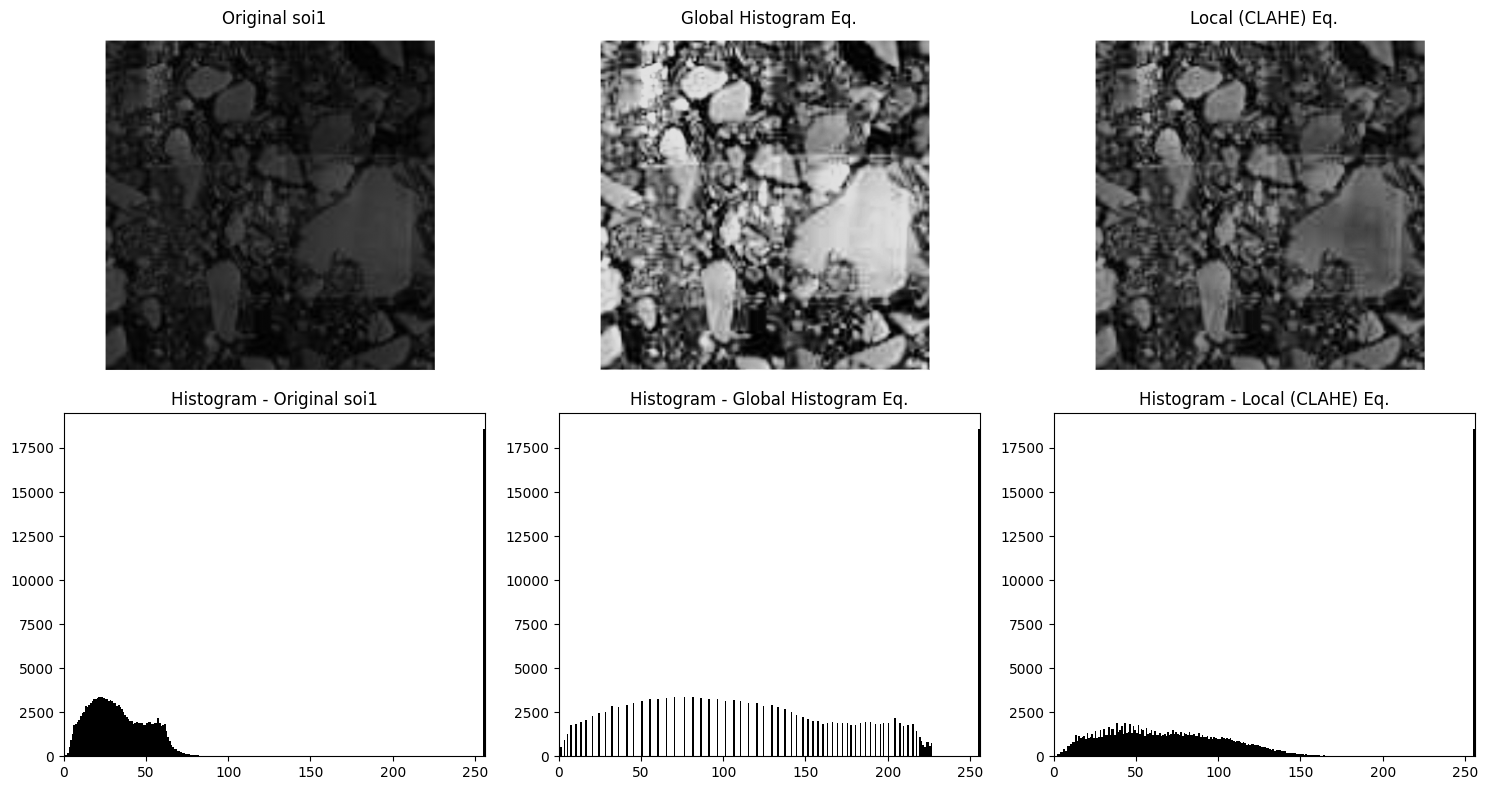

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Upload file
uploaded = files.upload()

# Get the actual filename from uploaded dict
filename = list(uploaded.keys())[0]

# Load image in grayscale
soi1 = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Global Histogram Equalization
global_eq = cv2.equalizeHist(soi1)

# Local Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
local_eq = clahe.apply(soi1)

# Titles and images
titles = ['Original soi1', 'Global Histogram Eq.', 'Local (CLAHE) Eq.']
images = [soi1, global_eq, local_eq]

plt.figure(figsize=(15, 8))

# Show images
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

# Show histograms
for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.hist(images[i].ravel(), 256, [0,256], color='black')
    plt.title(f'Histogram - {titles[i]}')
    plt.xlim([0,256])

plt.tight_layout()
plt.show()


Saving Screenshot 2025-08-26 104312.png to Screenshot 2025-08-26 104312 (1).png


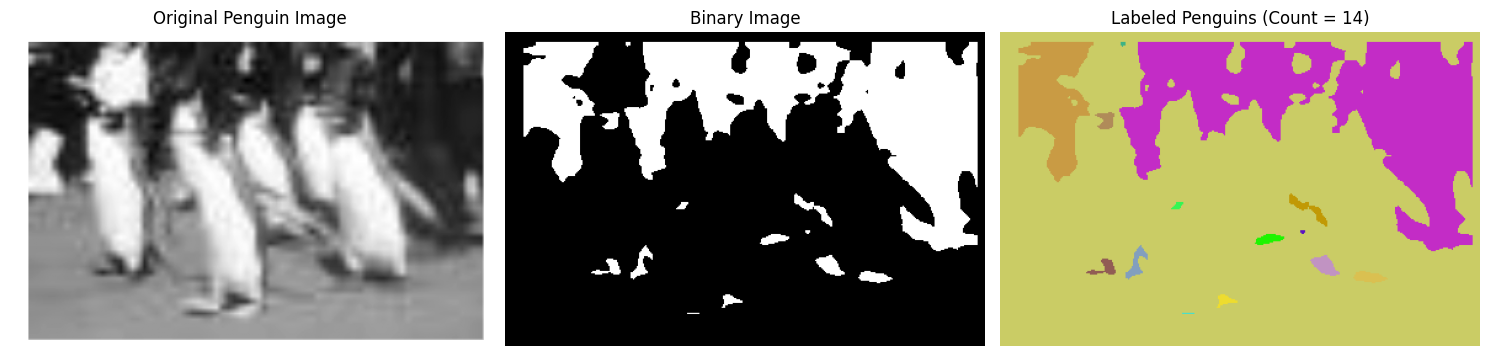

Total penguins detected: 14


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# --- Upload penguin image ---
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# --- Load in grayscale ---
pen1 = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# --- Thresholding (binary image) ---
# Adjust threshold value (100) if penguins are not separated well
_, binary = cv2.threshold(pen1, 100, 255, cv2.THRESH_BINARY_INV)

# --- Connected Components ---
num_labels, labels = cv2.connectedComponents(binary)

# --- Random color mapping for visualization ---
label_img = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.uint8)
colors = [tuple(np.random.randint(0,255,3).tolist()) for _ in range(num_labels)]

for r in range(labels.shape[0]):
    for c in range(labels.shape[1]):
        label_img[r, c] = colors[labels[r, c]]

# --- Show results ---
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(pen1, cmap='gray')
plt.title('Original Penguin Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(label_img)
plt.title(f'Labeled Penguins (Count = {num_labels-1})')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Total penguins detected:", num_labels - 1)
